# TD5 • Coding a simple perceptron with Backprop

<h3> Un <a href="http://playground.tensorflow.org/#activation=linear&regularization=L1&batchSize=29&dataset=gauss&regDataset=reg-plane&learningRate=0.001&regularizationRate=0.003&noise=15&networkShape=1&seed=0.37334&showTestData=true&discretize=false&percTrainData=50&x=false&y=false&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false">lien sympathique</a> pour s'amuser avec différentes architectures de réseau de neurones </h3>

In [209]:
import github_command as gt

In [212]:
gt.push(file_to_transfer="READMe.md",
        message="Added Keras example of the previous implemented perceptron", repos="TDs_ESILV.git")

In [210]:
gt.push(file_to_transfer="td5_ressources/",
       message="Ressources & images",
       repos="TDs_ESILV.git")

In [2]:
gt.push(file_to_transfer="TD5_A_Simple_NN_for_a_Simple_LR.ipynb",
        message="Added descriptions done in classes for students", repos="TDs_ESILV.git")

In [1]:
import os, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1> à l'origine, le perceptron... </h1>
<p> Le perceptron est un algorithme d'apprentissage supervisé de classifieurs binaires (c'est-à-dire séparant deux classes). Il a été inventé en 1957 par Frank Rosenblatt au laboratoire d'aéronautique de l'université Cornell.<p>

<img src="td4_ressources/img_perceptron_towards_data_science.png" width=500>

In [7]:
import numpy as np, pandas as pd

## A vector

In [8]:
test = np.array([1,2,3,4,5,6])
test

array([1, 2, 3, 4, 5, 6])

## Transpose vector

In [13]:
test.T

array([1, 2, 3, 4, 5, 6])

In [28]:
test.ndim # dim =0 :scalar | dim = 1 : vector | dim =2: matrix

1

In [29]:
test.shape

(6,)

In [30]:
np.array(2).ndim

0

## Reshape a vector or matrix into different size

In [9]:
test.reshape((2,3))

array([[1, 2, 3],
       [4, 5, 6]])

## as DataFrame

In [33]:
pd.DataFrame(test)

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [11]:
pd.DataFrame(test.reshape((2,3)))

,0,1,2
0,1,2,3
1,4,5,6


## dot Product (produit scalaire)

In [34]:
np.dot( np.array([1,0]), test.reshape((2,3)))

array([1, 2, 3])

## element-wise multiplication (Hadamard Product)

In [27]:
a = np.array([[1,2,3,4], [1,2,3,4], [1,2,3,4]])
b = np.array([2,3,4,5])
np.multiply(a,b)

array([[ 2,  6, 12, 20],
       [ 2,  6, 12, 20],
       [ 2,  6, 12, 20]])

## Créer un exemple avec un vecteur de valeurs randoms

In [4]:
%matplotlib inline

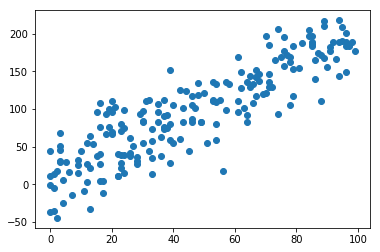

In [5]:
random_values = np.random.randint( 0, 100, (200, 1))
X, y = random_values, 2*random_values + np.random.normal(0, 30, size=(200,1))  # y = 2*x + epsilon with epsilon ~ N(0,1)
plt.scatter(x=X,y=y)
plt.show()

In [6]:
X.reshape((200,))

array([ 1, 16, 95, 61, 61, 15, 26, 76, 53, 73, 43, 88, 84, 67, 97,  3,  9,
       11, 74, 13, 86, 29, 22,  1, 23,  0, 20, 71, 87, 30, 78, 33, 95, 13,
       40, 51, 64,  6, 30, 66, 40, 23, 54, 56, 12, 53, 42, 71,  0, 28, 39,
        4, 12, 16, 48, 65, 68, 67, 85, 62, 54, 17, 21, 15, 14, 77, 71, 94,
       79, 26, 50, 85, 23, 26, 92, 94, 28, 43, 68, 39, 19, 12, 17, 89, 23,
       66, 32, 99, 57, 33, 88, 22, 30,  2, 33,  3, 62, 37, 39, 38, 82, 36,
       23, 78, 49, 79, 78, 96, 48, 24, 74,  5, 53, 36, 61, 37, 47, 70, 89,
       76, 20, 46, 20, 58, 91, 35, 13, 27, 86, 33,  7, 18, 31, 42,  9, 54,
       35, 37, 37, 35, 96,  3, 54, 10, 63, 84, 32, 76, 70, 64, 91,  3, 55,
       22, 16, 46, 46, 44, 79, 67, 28, 18, 20,  1, 89, 96, 45, 24, 81, 94,
       69, 39,  2, 85, 24, 96, 85, 49, 98, 30, 16, 46, 90, 16, 75, 24,  3,
       71,  4, 65,  0, 19,  0, 72, 38, 57, 64, 93,  9, 67])

In [7]:
pd.DataFrame({"X":  X.reshape((200,)), 'y': y.reshape((200,))})

,X,y
0,1,13.768436
1,16,108.477645
2,95,209.201057
3,61,168.685723
4,61,111.407319
...,...,...
195,57,135.581419
196,64,92.387057
197,93,166.693067
198,9,25.886497


In [52]:
weight = np.random.randint(-2,2, (X.shape[1],))
weight

array([0])

In [57]:
b = np.random.randint(0,10)
b

9

In [58]:
w = np.random.randint(-2,2,(1,1))
w

array([[1]])

In [59]:
y

array([[-39.49015945],
       [166.68791971],
       [ 52.60694096],
       [140.53762857],
       [ -3.00541532],
       [194.18097917],
       [189.41323431],
       [105.05136934],
       [146.799365  ],
       [ 29.30607457],
       [ 66.59905824],
       [  5.92846253],
       [173.80899736],
       [134.63069586],
       [101.34398066],
       [168.85842965],
       [ 96.26160151],
       [ 59.33780341],
       [158.84253519],
       [110.77710307],
       [216.71960825],
       [196.86238429],
       [135.60243193],
       [143.33912896],
       [ 93.38500182],
       [ 91.62711914],
       [-16.31791351],
       [174.65625884],
       [ 76.13604513],
       [ 14.28432912],
       [ 74.39597815],
       [132.34924308],
       [  5.85360588],
       [ 50.20081603],
       [ 88.62610286],
       [181.31937472],
       [166.22545376],
       [146.24121887],
       [ 90.43247471],
       [ 66.19318618],
       [ 67.24409125],
       [178.23898056],
       [120.28416641],
       [201

np.dot(X, weight) + b


<img src="td4_ressources/img_formula_gradient_descent_backprop_mattmazur.png" width=600>

<img src="td5_ressources/img_explanations_Bertin_Luc.png">

In [9]:
import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Neural_Network_1neuron:
    
    def __init__(self, X, y, nb_epochs=100, fixed_bias=False, learning_rate=0.03):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.20)
        self.X_train, self.X_test = self.scale_values(self.X_train, self.X_test)
        self.y_train, self.y_test = \
            np.reshape(self.y_train, (len(self.y_train),1)),\
            np.reshape(self.y_test, (len(self.y_test),1))
        
        self.weights = [] * X.shape[1]  # as many weights as features, here 1
        self.weights = self.init_weights(X)
        self.bias, self.fixed_bias    = 0, fixed_bias
        self.training_predictions, self.mse = 0, 0
        self.learning_rate = learning_rate
        self.nb_epochs = nb_epochs
        self.weights_update, self.bias_update = 0, 0
        self.records = pd.DataFrame([[self.weights, self.bias,0]], columns=['weights', 'bias', 'mse'])
    
    def scale_values(self, X_train, X_test):
        scale   = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test  = scale.transform(X_test)
        return X_train, X_test
        
    def init_weights(self, X):
        nb_of_features_input = X.shape[1]
        return np.random.randint(-2,2, (nb_of_features_input, 1))
    
    def activation(self):
        return x
    def derivate_activation(self):
        return 1
    
    def forward_pass(self):
        self.training_predictions = np.dot(self.X_train, self.weights) + self.bias
    
    def compute_mse(self):
        self.mse = 1/(2*len(self.X_train)) * sum( ( self.training_predictions - self.y_train)**2 )
    
    def backpropagation(self):
        # derivative of error by weights so to update them along with bias
        # dE/dw = dE/da * da/dz * dz/dw
        # w = w - n*dE/dw
        # E = mse = (1/2n)* sum(( predictions(==activations) - target)**2) ON ALL TRAINING EXAMPLES
        
        self.dE_da = self.training_predictions - self.y_train #for all training examples
        
        self.da_dz = self.derivate_activation() # derivate of activation
        
        self.dz_dw = self.X_train     # z = W*X + bias => dz_dw = X    
        
        self.weights_update, self.bias_update = \
            ( 1 / self.X_train.shape[0] ) * np.reshape( sum( self.dE_da * self.da_dz * self.dz_dw), (self.X_train.shape[1], 1) ),\
            ( 1 / self.X_train.shape[0] ) * sum( self.dE_da * self.da_dz ),  # weights updates, bias update
    
    def update(self):
        self.weights = self.weights - self.learning_rate * self.weights_update
        self.bias    = self.bias    - self.learning_rate * self.bias_update if not self.fixed_bias else self.bias
        
    def predict(self):
        return np.dot(self.X_test, self.weights) + self.bias
    
    def run(self):
        for i in range(1, self.nb_epochs):
            self.forward_pass()
            self.compute_mse()
            self.backpropagation()
            self.update()
            self.records.loc[i] = [self.weights, self.bias, self.mse]  
        return self.records

In [10]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=2000)

/Users/lucbertin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
records= unReseauDeNeurone.run()

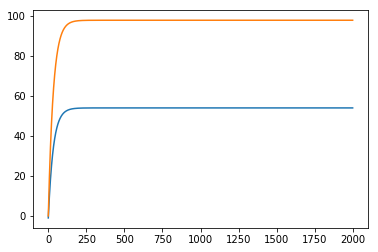

In [12]:
plt.plot(records['weights'])
plt.plot(records['bias'])

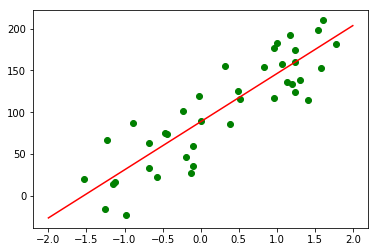

In [16]:
from sklearn.preprocessing import StandardScaler
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green')
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(unReseauDeNeurone.weights)*x_ + float(unReseauDeNeurone.bias)
plt.plot(x_, y_, color='red')

<IPython.core.display.Javascript object>


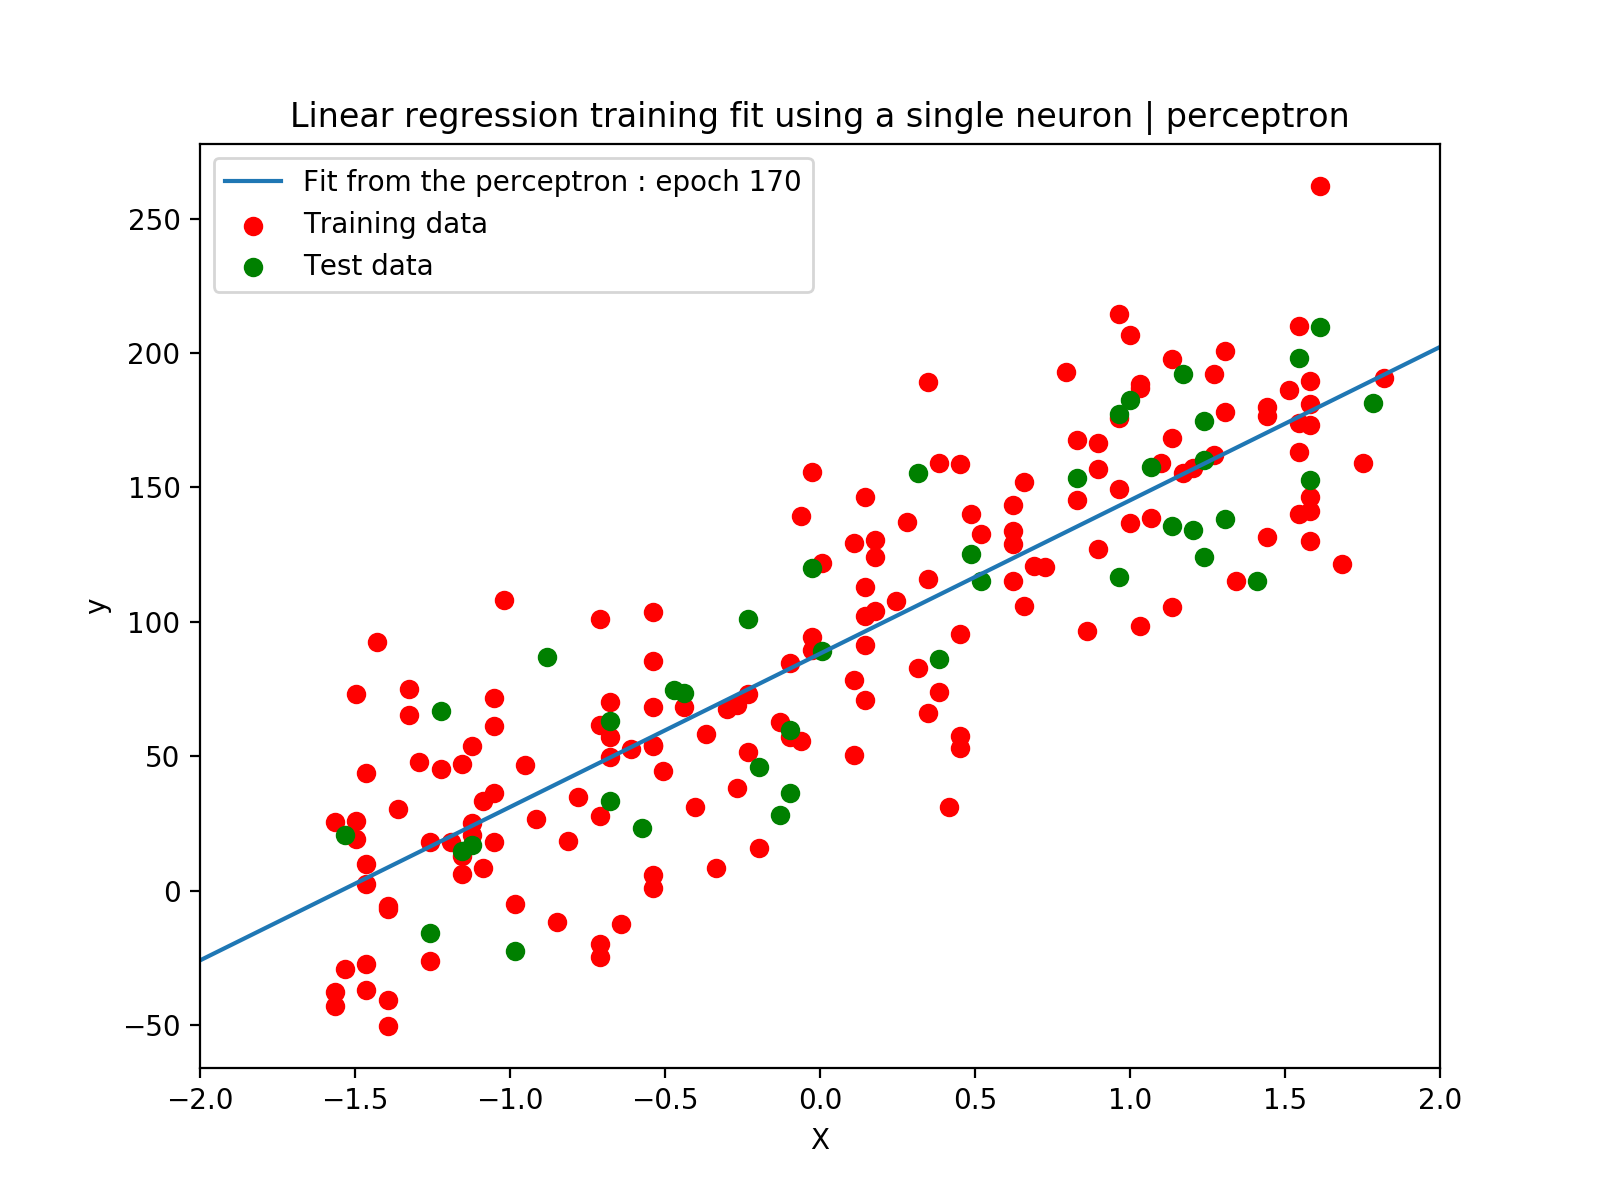

In [18]:
%matplotlib notebook

import matplotlib.animation as animation

fig, ax = plt.subplots()
# Initial plot
x_ = np.linspace(-2, 2, 100).reshape((100,1))
y_ = float(records.loc[0, "weights"])*x_ + float(records.loc[0, "bias"])

line, = ax.plot(x_, y_, label="Fit from the perceptron")

plt.rcParams["figure.figsize"] = (8,6)
plt.ylabel("y")
plt.xlabel("X")
plt.scatter(x=unReseauDeNeurone.X_train, y= unReseauDeNeurone.y_train, color='red', label="Training data")
plt.scatter(x=unReseauDeNeurone.X_test, y= unReseauDeNeurone.y_test, color='green', label="Test data")
plt.xlim(-2, 2)
plt.legend()
plt.title("Linear regression training fit using a single neuron | perceptron")

def animate(i):
    line.set_label("Fit from the perceptron : epoch {}".format(i))
    plt.legend()
    x_ = np.linspace(-2, 2, 100).reshape((100,1))
    line.set_xdata(x_)  # update the data
    line.set_ydata( float(records.loc[i, "weights"])*x_ + float(records.loc[i, "bias"]))# update the data
    return line,


In [19]:
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, len(records)), interval=100)
plt.show()

## Time to try with multiple features ;-)

In [26]:
from sklearn.datasets import load_boston

In [27]:
X, y=load_boston(True)

In [28]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [29]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lm.coef_

array([-0.96620454,  1.23781203,  0.36341317,  0.63008827, -1.8996985 ,
        2.7563194 ,  0.14444426, -2.78470628,  2.76313136, -2.19674258,
       -2.05812186,  0.88517458, -3.6199798 ])

In [36]:
unReseauDeNeurone = Neural_Network_1neuron(X, y, nb_epochs=5000, fixed_bias=True)

In [37]:
unReseauDeNeurone.forward_pass()

In [38]:
unReseauDeNeurone.compute_mse()

In [39]:
unReseauDeNeurone.backpropagation()

In [41]:
unReseauDeNeurone.weights_update

array([[ 1.17112081],
       [-2.80716197],
       [ 2.20648337],
       [-2.60100595],
       [ 1.53649353],
       [-6.35267367],
       [ 0.98673239],
       [ 0.08818374],
       [ 0.99814613],
       [ 1.83668694],
       [ 4.40765325],
       [-1.63153833],
       [ 5.02196791]])

In [42]:
unReseauDeNeurone.update()

In [43]:
unReseauDeNeurone.weights, unReseauDeNeurone.bias

(array([[-1.03513362],
        [-0.91578514],
        [-1.0661945 ],
        [-0.92196982],
        [ 0.95390519],
        [ 0.19058021],
        [-2.02960197],
        [ 0.99735449],
        [-2.02994438],
        [-0.05510061],
        [ 0.8677704 ],
        [ 0.04894615],
        [ 0.84934096]]), 0)

In [44]:
unReseauDeNeurone.run()

,weights,bias,mse
0,"[[-1], [-1], [-1], [-1], [1], [0], [-2], [1], ...",0,0
1,"[[-1.0600658475216926], [-0.8429564311694063],...",0,[285.54357387109593]
2,"[[-1.0767579350855052], [-0.779534345381746], ...",0,[282.89096308369574]
3,"[[-1.086807496320263], [-0.7239012479069222], ...",0,[280.7007169245824]
4,"[[-1.0915157130180937], [-0.6747345957806112],...",0,[278.84886417633453]
...,...,...,...
4995,"[[-0.687186549703986], [1.0599727562375176], [...",0,[257.2783683478366]
4996,"[[-0.6871865956252705], [1.0599728209706125], ...",0,[257.278368347802]
4997,"[[-0.687186641462786], [1.059972885585622], [-...",0,[257.2783683477677]
4998,"[[-0.6871866872166852], [1.059972950082762], [...",0,[257.2783683477334]


### Visualization • Multiple regression line

In [47]:
lm.coef_

array([-0.96620454,  1.23781203,  0.36341317,  0.63008827, -1.8996985 ,
        2.7563194 ,  0.14444426, -2.78470628,  2.76313136, -2.19674258,
       -2.05812186,  0.88517458, -3.6199798 ])

In [48]:
at_499  = unReseauDeNeurone.records.loc[499, "weights"].reshape((13,))
at_1999 = unReseauDeNeurone.records.loc[1999, "weights"].reshape((13,))
at_4999 = unReseauDeNeurone.records.loc[4999, "weights"].reshape((13,))

<BarContainer object of 13 artists>

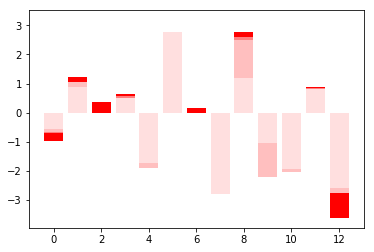

In [49]:
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_499, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_1999, color='white', alpha = 0.5)
plt.bar(x=np.arange(len(lm.coef_)), height=at_4999, color='white', alpha = 0.5)

## In Keras ? 

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [120]:
from keras.callbacks import ModelCheckpoint

In [107]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [108]:
model = Sequential()
model.add(Dense(1, input_shape=(X.shape[1],), activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd)

## A callback to store weights

In [177]:
df_weights = {}
def save_weights(epoch, logs):
    df_weights[epoch] = model.layers[0].get_weights()

In [178]:
keep_weights = LambdaCallback(on_epoch_end=save_weights)

In [179]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=X_train.shape[0], epochs=500, 
                    validation_data=(X_test, y_test), 
                    verbose=0, callbacks=[keep_weights])

In [183]:
weights = pd.DataFrame(df_weights).T

In [184]:
history.params

{'batch_size': 404,
 'epochs': 500,
 'steps': None,
 'samples': 404,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [186]:
losses_ = pd.DataFrame(history.history)

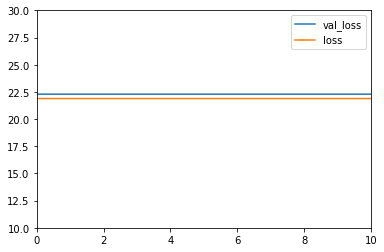

In [207]:
losses_.plot(kind="line", ylim=(10,30), xlim=(0,10))

<BarContainer object of 13 artists>

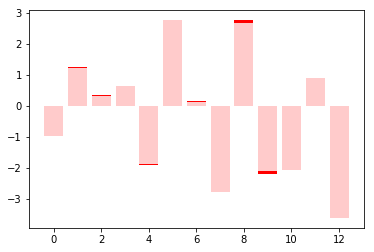

In [204]:
at_499  = weights.loc[499, 0].reshape((13,))
plt.bar(x=np.arange(len(lm.coef_)), height=lm.coef_, color='red')
plt.bar(x=np.arange(len(lm.coef_)), height=at_499, color='white', alpha = 0.8)

In [205]:
history.model.get_weights()

[array([[-0.960102  ],
        [ 1.2244184 ],
        [ 0.32739377],
        [ 0.6351688 ],
        [-1.8948327 ],
        [ 2.7635255 ],
        [ 0.13879687],
        [-2.7843046 ],
        [ 2.670297  ],
        [-2.0908844 ],
        [-2.0564735 ],
        [ 0.8835324 ],
        [-3.613994  ]], dtype=float32), array([22.750944], dtype=float32)]

# Fin.